# Data visualization

**Author**: Thiago Assumpção

**Summary**: In this notebook, we produce 1D and 2D plots of data from `hydro_without_hydro` runs.

## Import necessary modules

In [1]:
import sys, os

In [2]:
# os.chdir("/Users/thiago/Documents/PostDocProjects/headon-nrpyelliptic/")
os.chdir("../")
os.getcwd()

'/Users/thiago/Documents/PostDocProjects/headon-nrpyelliptic'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from post_processing.plot_functions import plot_2d

In [4]:
# Plotting settings
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "STIXGeneral"

In [5]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rc("text", usetex=True)
# plt.rc('font', family='serif')

## Import `hydro_without_hydro` data

We begin by reading data from a relaxation performed with `hydro_without_hydro`.

In [6]:
# Set path to data directory
# data_dir = os.path.join("project", "modified_C_code_hydro_without_hydro")
data_dir = os.path.join("project", "hydro_without_hydro")

In [7]:
def list_files_alphabetically(directory):
    return sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))], key=str.lower)

In [8]:
# List files in alphabetical order for convenience
files_list = list_files_alphabetically(data_dir)

# Set up list with 1D output files
files_1D_r = [os.path.join(data_dir, file) for file in files_list if "out1d-r" in file]
files_1D_y = [os.path.join(data_dir, file) for file in files_list if "out1d-y" in file]
files_1D_z = [os.path.join(data_dir, file) for file in files_list if "out1d-z" in file]

# Set up list with 2D output files
files_2D_xy = [os.path.join(data_dir, file) for file in files_list if "out2d-xy" in file]
files_2D_yz = [os.path.join(data_dir, file) for file in files_list if "out2d-yz" in file]

# Plot 1D data

In [9]:
len(files_1D_z)

1

In [10]:
step_idx = 0

which_axis = "z"

if which_axis == "r":
    data_1d = files_1D_r[step_idx]
elif which_axis == "y":
    data_1d = files_1D_y[step_idx]
elif which_axis == "z":
    data_1d = files_1D_z[step_idx]
else:
    print(f"Plane {which_axis} not available to plot")
    sys.exit(1)

# Load data onto numpy arrays
zAxis, HGF, MSQUAREDGF, CFGF, ALPHAGF, TRKGF = np.loadtxt(data_1d).T

In [11]:
# # Set TOV parameters
# R_Schw_max = 9.566044579232511e-01
# M = 1.405030336771405e-01 
# rbar_max = 0.5 * (R_Schw_max - M + np.sqrt(R_Schw_max * (R_Schw_max - 2.0 * M)))

# # Exact lapse function
# alpha_exact = (1.0 - M / (2 * zAxis)) / (1.0 + M / (2 * zAxis))

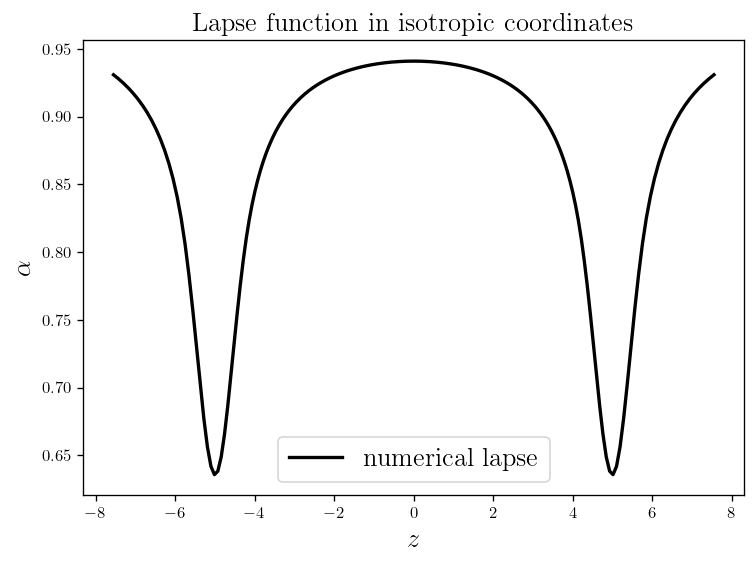

In [12]:
# Create a new figure
plt.figure(dpi=120)

z_min = -7.5
z_max = 7.5

idx_min = np.argmin(np.abs(zAxis - z_min))
idx_max = np.argmin(np.abs(zAxis - z_max)) + 1

axis_to_plot = zAxis[idx_min:idx_max]
func_to_plot1 = ALPHAGF[idx_min:idx_max]
# func_to_plot2 = alpha_exact[idx_min:idx_max]

# Plot interpolated data along z-axis
# plt.scatter(axis_to_plot, func_to_plot1, color="red", label="conformal factor", s=1.0)
plt.plot(axis_to_plot, func_to_plot1, color="black", label="numerical lapse", lw=2.0)
# plt.plot(axis_to_plot, func_to_plot2, color="red", ls="dashed", label="Schwarzschild lapse", lw=2.0)

plt.xlabel(r"$z$", fontsize=16)
plt.ylabel(r"$\alpha$", fontsize=16)

plt.title(r"Lapse function in isotropic coordinates", fontsize=16)  # Add a title here
plt.legend(fontsize=16);

# Show the plot
plt.tight_layout()
plt.show()


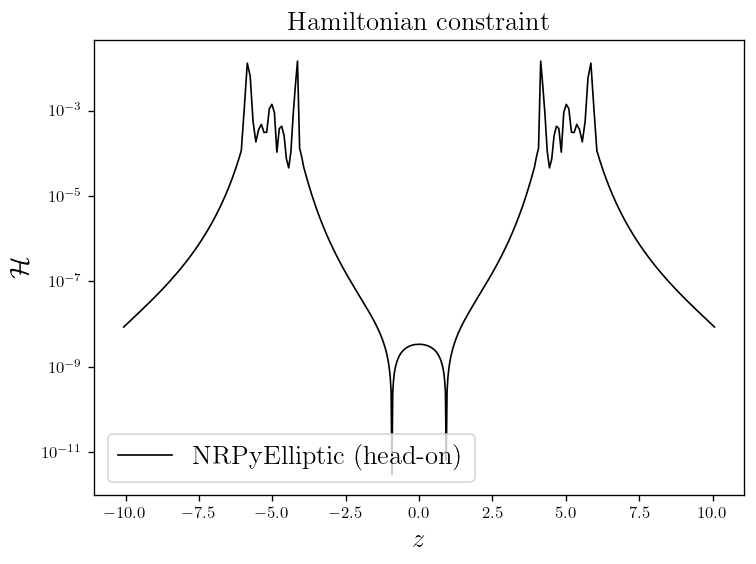

In [13]:
# Create a new figure
plt.figure(dpi=120)

z_min = -10
z_max = 10

idx_min = np.argmin(np.abs(zAxis - z_min))
idx_max = np.argmin(np.abs(zAxis - z_max)) + 1

axis_to_plot = zAxis[idx_min:idx_max]
func_to_plot1 = 10**(HGF[idx_min:idx_max])
func_to_plot2 = 10**MSQUAREDGF[idx_min:idx_max]

# Plot interpolated data along z-axis
# plt.scatter(axis_to_plot, func_to_plot1, color="red", label="conformal factor", s=1.0)
plt.semilogy(axis_to_plot, func_to_plot1, color="black", label="NRPyElliptic (head-on)", lw=1.0)
# plt.plot(axis_to_plot, func_to_plot2, color="red", label="Momentum constraint", lw=1.0, ls="dashed")

plt.xlabel(r"$z$", fontsize=16)
plt.ylabel(r"$\mathcal{H}$", fontsize=16)

plt.title(r"Hamiltonian constraint", fontsize=16)  # Add a title here
plt.legend(fontsize=16);

# Show the plot
plt.tight_layout()
plt.show()


# Plot 2D data

In [14]:
from post_processing.plot_functions import plot_2d

In [15]:
# Data index
data_idx = 0

# We extract data from the last outputted step
which_plane = "yz"

if which_plane == "xy":
    data_2d = files_2D_xy[data_idx]
elif which_plane == "yz":
    data_2d = files_2D_yz[data_idx]
else:
    print(f"Plane {which_plane} not available to plot")
    sys.exit(1)

# Load data onto numpy arrays
yAxis, zAxis, HGF, MSQUAREDGF, CFGF, ALPHAGF, TRKGF = np.loadtxt(data_2d).T

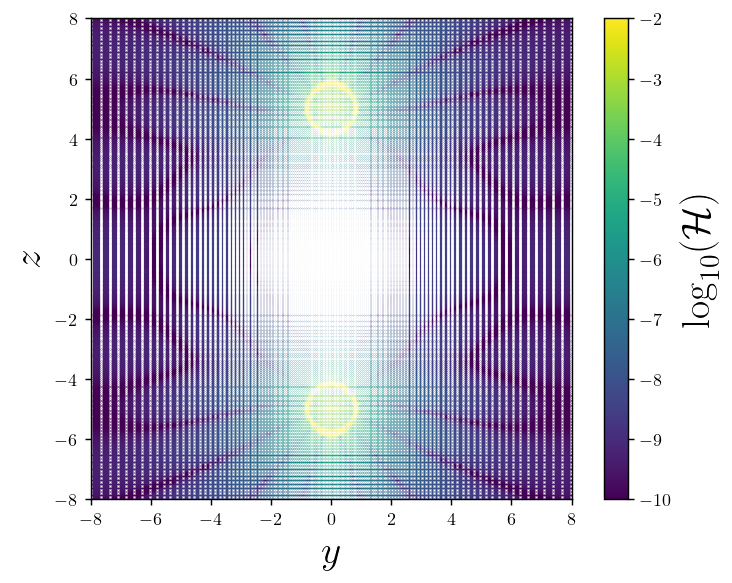

In [16]:
plot_2d(
    plotquantity=HGF,
    func_str_label=r"$\log_{10}(\mathcal{H})$",
    # log_scale=True,
    ylim=[-10, -2],
    x_data=yAxis, 
    y_data=zAxis,
    axes_label = "yz",
    xy_center = [0, 0],
    xy_plot_range= [8, 8],
    label_fontsize=22,
    cmap="viridis",
    plot_gpts=True,
    plot_contours=False,
    num_contours=10,
    dpi=130,
)

In [17]:
np.isnan(10**HGF).any()

np.False_